<a href="https://colab.research.google.com/github/sebibita/CIS376TermProject/blob/main/HW3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
file_path = "/content/drive/MyDrive/HW3/hw_lib/linear_classification.py"

code = """
import numpy as np

def flatten_array(image):
    image = np.array(image)
    if image.ndim == 3:
        image = image.squeeze()
    return image.reshape(-1)

def logistic_function(x):
    return 1 / (1 + np.exp(-x))

def logistic_classification(flat_x, coefficients):
    x = np.array(flat_x).flatten()
    x_with_bias = np.concatenate(([1], x))
    logits = np.dot(coefficients, x_with_bias)
    return logistic_function(logits)

def softmax(x):
    x = np.array(x)
    shifted = x - np.max(x)
    exp_vals = np.exp(shifted)
    return exp_vals / np.sum(exp_vals)

def softmax_classifier(flat_x, weights):
    x = np.array(flat_x).flatten()
    x_with_bias = np.concatenate(([1], x))
    logits = weights @ x_with_bias
    probs = softmax(logits)
    pred_class = np.argmax(probs)
    return pred_class, probs
"""

with open(file_path, "w") as f:
    f.write(code)

print("✅ File successfully overwritten!")


✅ File successfully overwritten!


# Setup Code
Before getting started we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook.

### Google Colab Setup
Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Now recall the path in your Google Drive where you uploaded this notebook, fill it in below. If everything is working correctly then running the folowing cell should print the filenames from the assignment:

```
['HW3.ipynb', 'hw_lib']
```

In [4]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "HW3"   # or whatever folder name you have
assert GOOGLE_DRIVE_PATH_AFTER_MYDRIVE is not None
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))


['HW3 (1).ipynb', 'hw_lib', '.DS_Store', 'HW3.ipynb']


Once you have successfully mounted your Google Drive and located the path to this assignment, run the following cell to allow us to import from the `.py` files of this assignment.
If everything works correctly, you should see
```
Hello Deep Learning
```

In [5]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

from hw_lib import utils
from importlib import reload
reload(utils)

utils.hello()

Hello Deep Learning


# Fill your UMID and unique name

Now find `um_id()` and `unique_name()` and implement them.
**This is required before turning in your assigments because this makes sure auto-grading system can assign grades correctly to you.**

In [8]:
from hw_lib import utils
from importlib import reload
reload(utils)

my_unique_name = utils.unique_name()
assert my_unique_name is not None
print(my_unique_name)

sebibita


In [9]:
from hw_lib import utils
from importlib import reload
reload(utils)

my_um_id = utils.um_id()
assert my_um_id is not None
assert isinstance(my_um_id, str)
assert len(my_um_id) == 8
print(my_um_id)

98778610


# Numpy Practice (10 points)

This section requires no additional implementation from you. Running all the code inside it guarantees full marks. If you're comfortable with numpy, feel free to execute the entire section at once. However, the examples provided here are designed to assist you in answering questions in subsequent sections.



## `array`

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The shape of an array is a tuple of integers giving the size of the array along each dimension.

#### Create numpy `array`

In [37]:
import numpy as np

m_1x3 = np.array([1, 2, 3])
print("m_1x3:\n ", m_1x3)

m_2x3 = np.array([[1,2,3],[4,5,6]])
print("m_2x3:\n ", m_2x3)


m_1x3:
  [1 2 3]
m_2x3:
  [[1 2 3]
 [4 5 6]]


#### Check numpy `array` shape

In [38]:
import numpy as np

m_1x3 = np.array([1, 2, 3])
print("m_1x3:\n ", m_1x3.shape)

m_2x3 = np.array([[1,2,3],[4,5,6]])
print("m_2x3:\n ", m_2x3.shape)


m_1x3:
  (3,)
m_2x3:
  (2, 3)


#### `reshape` array

In [39]:
import numpy as np
m_2x3 = np.array([[1,2,3],[4,5,6]])
print("m_2x3:\n ", m_2x3.shape)

m_6x1 = m_2x3.reshape(-1)
print("m_6x1:\n ", m_6x1.shape)

stretched_dim = 1
for dim in m_2x3.shape:
    stretched_dim = stretched_dim * dim

m_6x1 = m_2x3.reshape(stretched_dim)
print("m_6x1:\n ", m_6x1.shape)


m_2x3:
  (2, 3)
m_6x1:
  (6,)
m_6x1:
  (6,)


#### Numpy `array` indexing

NumPy array indexing allows you to access elements, rows, columns, and sub-arrays from a larger array. Here are some examples to illustrate different types of indexing:

In [40]:
import numpy as np

# Example 1: Basic Indexing
a = np.array([[1, 2, 3], [4, 5, 6]])

# Accessing a single element
print("Single element [0,1]:", a[0, 1])

# Accessing a row
print("First row:", a[0])

# Accessing a column
print("Third column:", a[:, 2])

# Example 2: Slicing
# Slicing rows and columns
print("Slice rows 1-2, columns 1-2:", a[0:2, 0:2])

# Slicing with step
print("Slice every second element:", a[::2, ::2])

# Example 3: Fancy Indexing
# Using an array of indices
print("Select elements (0,1) and (1,2):", a[[0, 1], [1, 2]])

# Using boolean array
b = a > 3
print("Boolean indexing:", a[b])

# Example 4: Combining Indexing Methods
# Mix slicing with integer indexing
print("Second row, first two columns:", a[1, :2])

# Mix slicing with boolean indexing
print("Columns where second row > 4:", a[:, a[1] > 4])


Single element [0,1]: 2
First row: [1 2 3]
Third column: [3 6]
Slice rows 1-2, columns 1-2: [[1 2]
 [4 5]]
Slice every second element: [[1 3]]
Select elements (0,1) and (1,2): [2 6]
Boolean indexing: [4 5 6]
Second row, first two columns: [4 5]
Columns where second row > 4: [[2 3]
 [5 6]]


#### Matrix Multiplication
Matrix multiplication is a fundamental operation in linear algebra. In Python, NumPy provides a straightforward way to perform matrix multiplication using the np.dot function or the @ operator (introduced in Python 3.5).

In [41]:
import numpy as np

# Example 1: Dot Product of Two Vectors
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
dot_product = np.dot(a, b)  # or a @ b
print("Dot Product:", dot_product)

# Example 2: Matrix Multiplication (2D Arrays)
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
result = np.dot(A, B)  # or A @ B
print("\nMatrix Multiplication Result:\n", result)

# Example 3: Matrix-Vector Multiplication
C = np.array([[1, 2], [3, 4]])
v = np.array([9, 10])
result_vector = np.dot(C, v)  # or C @ v
print("\nMatrix-Vector Multiplication Result:", result_vector)

# Example 4: Multiplication of Matrices of Different Sizes
D = np.array([[1, 2, 3], [4, 5, 6]])
E = np.array([[7, 8], [9, 10], [11, 12]])
result_diff_size = np.dot(D, E)  # or D @ E
print("\nMultiplication of Different Sized Matrices:\n", result_diff_size)


Dot Product: 32

Matrix Multiplication Result:
 [[19 22]
 [43 50]]

Matrix-Vector Multiplication Result: [29 67]

Multiplication of Different Sized Matrices:
 [[ 58  64]
 [139 154]]


## `random.rand`

`random.rand` is a function from NumPy's random module that generates an array of specified shape with random samples from a uniform distribution over [0, 1). This means each number in the array will be a floating-point value between 0 (inclusive) and 1 (exclusive).

In [42]:
import numpy as np

# Setting a fixed seed for reproducibility
np.random.seed(42)
# Generating a 1x2 array of random floats between 0 and 1
random_array = np.random.rand(1, 2)
print("Seed 42: ", random_array)

# Setting a fixed seed for reproducibility
np.random.seed(0)
random_array = np.random.rand(1, 2)
print("Seed 42: ", random_array)


np.random.seed(42)
# Generating a 1x2 array of random floats between 0 and 1
random_array = np.random.rand(1, 2)
print("Seed 42 again ", random_array)

Seed 42:  [[0.37454012 0.95071431]]
Seed 42:  [[0.5488135  0.71518937]]
Seed 42 again  [[0.37454012 0.95071431]]


## `linalg.inv`

`linalg.inv` is a function from NumPy's linalg (linear algebra) module that computes the inverse of a square matrix.

In [43]:
import numpy as np

# Define a square matrix
A = np.array([[1, 2], [3, 4]])

# Compute the inverse
A_inv = np.linalg.inv(A)

print("Matrix A:\n", A)
print("Inverse of A:\n", A_inv)

# Verifying that A * A_inv yields the identity matrix
identity_matrix = np.dot(A, A_inv)
print("Product of A and A_inv (should be identity):\n", identity_matrix)

Matrix A:
 [[1 2]
 [3 4]]
Inverse of A:
 [[-2.   1. ]
 [ 1.5 -0.5]]
Product of A and A_inv (should be identity):
 [[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


### `linalg.solve`

This function is designed to solve a linear matrix equation or a system of linear scalar equations.

In [44]:
import numpy as np

# Coefficient matrix A
A = np.array([[3, 2], [1, 1]])

# Outcome vector b
b = np.array([5, 3])

# Solving for x
x = np.linalg.solve(A, b)

print(x)


[-1.  4.]


## `vstack`

`vstack` is a function in NumPy used for vertical stacking, meaning it stacks arrays in sequence vertically (row wise). This function is helpful when you want to combine arrays of the same number of columns into a single array, effectively increasing the number of rows.



In [45]:
import numpy as np

# Create two arrays
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Vertically stack the two arrays
c = np.vstack((a, b))

print(c)

[[1 2 3]
 [4 5 6]]


## `hstack`

`hstack` is a function in NumPy used for horizontal stacking, meaning it stacks arrays in sequence horizontally (column wise). This function is particularly useful when you want to combine arrays of the same number of rows into a single array.

In [46]:
import numpy as np

# Define a 2D array
A = np.array([[2, 3], [5, 6], [8, 9]])

# Create a column of ones with the same number of rows as A
ones_column = np.ones((A.shape[0], 1))

# Horizontally stack the column of ones to the array A
A_with_ones = np.hstack((ones_column, A))

print(A_with_ones)



[[1. 2. 3.]
 [1. 5. 6.]
 [1. 8. 9.]]


# Linear Regression (50 pts)

In this section, your task involves implementing multiple functions related to linear regression.

## 1-Dimensionnal inputs (20 pts)

#### Data generation
Firstly, we will generate a set of random data, ensuring consistency by using a fixed random seed.

In [20]:
import numpy as np
# Setting a fixed seed for reproducibility
np.random.seed(42)

# Parameters for the line
slope_true = 2
intercept_true = 1
m_points = 10

# Generating X values
X_1d = np.random.rand(m_points) * 10  # Scaling X to have a wider range

# Generating y values from the line equation and adding random noise
noise = np.random.randn(m_points)  # Gaussian noise
y_1d = intercept_true + slope_true * X_1d + noise

#### `linear_predict_1d` (10 pts)

The initial task involves implementing the `linear_predict_1d` function within the `linear_regression.py` file. This function should accept a one-dimensional data point, along with the slope and intercept, and return the corresponding prediction.

In [21]:
from hw_lib import linear_regression
from importlib import reload
reload(linear_regression)

predicted_value = linear_regression.linear_predict_1d(x=X_1d[0],
                                                      slope=slope_true,
                                                      intercept=intercept_true)

assert predicted_value is not None

expected_solution = 8.49080237694725
assert np.allclose(predicted_value, expected_solution)

#### `linear_fit_1d` (10 pts)

This section requires you to implement the `linear_fit_1d` function in the `linear_regression.py` file. This function should be designed to process multiple one-dimensional data points and yield the optimal fitting parameters for the linear model.

In [22]:
from hw_lib import linear_regression
from importlib import reload
reload(linear_regression)

best_coeff = linear_regression.linear_fit_1d(X_1d, y_1d)

assert best_coeff is not None


expected_solution = np.array([-0.33637868, 2.15093373])
assert best_coeff.shape == (2, )
assert np.allclose(best_coeff, expected_solution)

#### Plot the data
A plot can be created to visually display all the data points alongside the best-fitted line derived from the linear model.

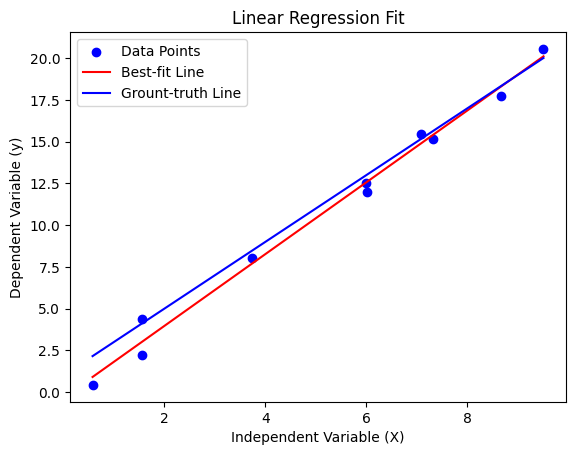

In [23]:
import matplotlib.pyplot as plt
reload(linear_regression)

# Generating a scatter plot of the data points
plt.scatter(X_1d, y_1d, color='blue', label='Data Points')

intercept, slope = best_coeff

# Generating the best-fit line
X_fit = np.linspace(X_1d.min(), X_1d.max(), 100)

y_fit = linear_regression.linear_predict_1d(X_fit, slope, intercept)
y_gt = linear_regression.linear_predict_1d(X_fit, slope_true, intercept_true)
# Plotting the best-fit line
plt.plot(X_fit, y_fit, color='red', label='Best-fit Line')
plt.plot(X_fit, y_gt, color='blue', label='Grount-truth Line')
# Adding labels and title
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression Fit')
plt.legend()

# Displaying the plot
plt.show()

## N-dimensional inputs (30 pts)

#### Data generation
Firstly, we will generate a set of random data, ensuring consistency by using a fixed random seed.

In [24]:
import numpy as np
# Setting a fixed seed for reproducibility
np.random.seed(42)

# Parameters for the line
coeff_true = np.array([1, 2, 3, 4])
m_points = 100
n_dim = 3

# Generating random input data
# Let's create data with 3 features (n = 3) and 100 observations (m = 100)
# Generating X values
X = np.random.rand(m_points, n_dim) * 10  # Scaling X to have a wider range

# Generating y values from the line equation
y = X.dot(coeff_true[1:].T) + coeff_true[0]


#### `linear_predict_nd` (15 pts)

The initial task involves implementing the `linear_predict_nd` function within the `linear_regression.py` file. This function should accept a n-dimensional data point, along with the slope and intercept, and return the corresponding prediction.

In [25]:
from hw_lib import linear_regression
from importlib import reload
reload(linear_regression)

prediction = linear_regression.linear_predict_nd(X[0], coeff_true)

assert best_coeff is not None
assert np.allclose(prediction, y[0])


#### `linear_fit_nd` (15 pts)

This section requires you to implement the `linear_fit_nd` function in the `linear_regression.py` file. This function should be designed to process multiple n-dimensional data points and yield the optimal fitting parameters for the linear model.

In [26]:
from hw_lib import linear_regression
from importlib import reload
reload(linear_regression)

best_coeff = linear_regression.linear_fit_nd(X, y)

assert best_coeff is not None
assert np.allclose(best_coeff, coeff_true)

# Linear Classification (40 pts)

### Load MNIST image data (5 pts)

#### Load the first MNIST image

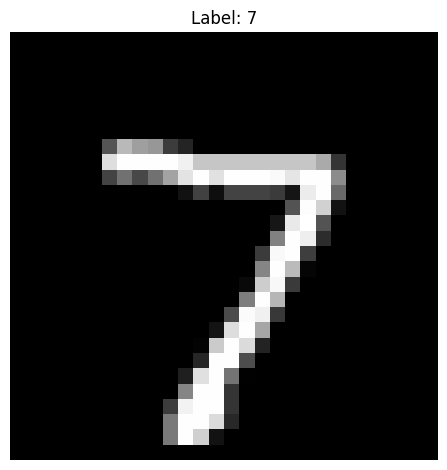

In [75]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the MNIST training data
dataset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=False)

# Get one batch of training images
images, labels = next(iter(dataloader))

def imshow(img, label):
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Label: {label}")

image, label = images[0].numpy(), labels[0].item()
# Show the first image
imshow(image, label)
plt.axis('off')
plt.tight_layout()
plt.show()

#### Flatten the image into a vector (5 pts)

Implement `flatten_array` in `linear_classification.py`

In [77]:
from hw_lib import linear_classification
from importlib import reload
reload(linear_classification)

expected_flatted_array_shape_candidates = [(28*28,), (28*28, 1)]

flatten_input = linear_classification.flatten_array(image)

assert flatten_input is not None
assert flatten_input.shape in expected_flatted_array_shape_candidates

### Logistic Classification (20 pts)

#### Implement a logsitic function (5 pts)
Implement a logistic function  `logsitic_function` in `linear_classification.py` using the equation below:

$$f(x) = \frac{1}{(1+e^{-x})}$$

In [124]:
import numpy as np

def logistic_function(x):
    """
    Compute the logistic (sigmoid) function.

    f(x) = 1 / (1 + exp(-x))

    Args:
        x (float or np.ndarray): Input value(s).

    Returns:
        float or np.ndarray: Logistic output.
    """
    return 1 / (1 + np.exp(-x))


#### Implement logistic classification (15 pts)
Implement a logistic classification function `logistic_classification` in `linear_classification.py`. Look at the docstring of the function for more details.

In [125]:
from hw_lib import linear_classification
from importlib import reload
reload(linear_classification)

coefficients = np.zeros(flatten_input.shape[0]+1)
prob = linear_classification.logistic_classification(flatten_input, coefficients)

expected_prob = 0.5
assert prob is not None
print(prob)
assert np.allclose(prob, expected_prob)

0.5


### Image Classification with Softmax (20 pts)

#### Implement a softmax function (5 pts)

Implement function `softmax` in `linear_classification.py`.

In [119]:
from hw_lib import linear_classification
from importlib import reload
reload(linear_classification)

x = np.array([1.0, 2.0, 3.0])
expected_output = np.array([0.09003057, 0.24472847, 0.66524096])

probs = linear_classification.softmax(x)

assert probs is not None
assert np.allclose(probs, expected_output)

In linear_classification.py, we offer a reliable method for implementing softmax to prevent numerical problems. Verify if your version yields outcomes that match those of this implementation.

In [120]:
from hw_lib import linear_classification
from importlib import reload
reload(linear_classification)

x = np.array([10000.0, 10000.0, 10000.0])

probs = linear_classification.softmax(x)
print(probs)

safe_probs = linear_classification.safe_softmax(x)
print(safe_probs)


[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333]


#### Implement an image classifier with softmax (15 pts)

Implement function `softmax_classifier` in `linear_classification.py` using the equation below:
$$p(label = k) =
\frac{e^{s_k}}{\sum_j{e^{s_j}}}
$$

Check docstrings of the class for more details of inputs and outputs.


In [135]:
import numpy as np

def flatten_array(image):
    """
    Flatten a 28×28 MNIST image into a 1D vector of length 784.
    - Supports input shapes (28, 28), (1, 28, 28), or (28, 28, 1)
    """
    image = np.array(image)

    # Remove channel dimension if it exists
    if image.ndim == 3:
        image = image.squeeze()

    return image.reshape(-1)


def logistic_function(x):
    """
    Logistic (sigmoid) function:
        σ(x) = 1 / (1 + exp(-x))
    """
    return 1 / (1 + np.exp(-x))


def logistic_classification(flat_x, coefficients):
    """
    Perform binary logistic regression classification.

    - flat_x: flattened image (784,)
    - coefficients: weights including bias (785,)

    Returns:
        probability (float)
    """
    x = np.array(flat_x).flatten()

    # Add bias: [1, x1, x2, ..., x784]
    x_with_bias = np.concatenate(([1], x))

    logits = np.dot(coefficients, x_with_bias)

    return logistic_function(logits)


def softmax(x):
    """
    Compute softmax over a 1D logit vector.
    """
    x = np.array(x)
    shifted = x - np.max(x)      # numerical stability
    exp_vals = np.exp(shifted)
    return exp_vals / np.sum(exp_vals)


def softmax_classifier(flat_x, weights):
    """
    Softmax classifier for multi-class classification.

    Inputs:
        flat_x: flattened MNIST image, shape (784,)
        weights: matrix of shape (num_classes, 785)
                 Each row: [bias, w1, w2, ..., w784]

    Returns:
        predicted_class: int (argmax of probabilities)
        probabilities: softmax probability vector (num_classes,)
    """
    x = np.array(flat_x).flatten()

    # Add bias to input vector
    x_with_bias = np.concatenate(([1], x))  # shape (785,)

    # Compute logits for each class
    logits = weights @ x_with_bias          # shape (num_classes,)

    # Convert logits to probabilities
    probs = softmax(logits)

    # Most likely class
    pred_class = np.argmax(probs)

    return pred_class, probs
